In [0]:
# 선형회귀

# 필요한 라이브러리 import 먼저 수행
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# 1단계 : 데이터 준비
air = pd.read_excel("./기상_미세먼지_병합파일.xlsx", encoding='cp949', header=0)
air.head()

# 컬럼명 변경
air.columns=['NO.', 'Data', 'Place', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM2.5',
             'TIME', 'TEMPERATURE', 'WIND_DIRECTION', 'WIND_SPEED', 'HUMIDITY']
air.head()

,NO.,Data,Place,SO2,CO,O3,NO2,PM10,PM2.5,TIME,TEMPERATURE,WIND_DIRECTION,WIND_SPEED,HUMIDITY
0,0,2019-03-02,서울 중구,0.005,1.0,0.018,0.063,113.0,75.0,2019-03-02 1,4.2,2.5,0.4,46.5
1,1,2019-03-02,서울 종로구,0.005,1.2,0.019,0.063,114.0,80.0,2019-03-02 1,4.2,2.5,0.4,46.5
2,2,2019-03-02,서울 용산구,0.004,1.0,0.014,0.059,108.0,88.0,2019-03-02 1,4.2,2.5,0.4,46.5
3,3,2019-03-02,서울 광진구,0.005,1.2,0.019,0.051,125.0,85.0,2019-03-02 1,4.2,2.5,0.4,46.5
4,4,2019-03-02,서울 성동구,0.004,1.1,0.007,0.078,137.0,97.0,2019-03-02 1,4.2,2.5,0.4,46.5


In [0]:
# 2단계 : 데이터 탐색
print(air['SO2'].unique())
print(air['CO'].unique())
print(air['O3'].unique())
print(air['NO2'].unique())
print(air['PM10'].unique())
print(air['PM2.5'].unique())
print(air['TEMPERATURE'].unique())
print(air['WIND_DIRECTION'].unique())
print(air['WIND_SPEED'].unique())
print(air['HUMIDITY'].unique())

# 확인한 결과 '아황산가스', '일산화탄소', '오존', '이산화질소'
# 이렇게 4가지의 결과에서 NaN 값이 발견 됨
# 엑셀 파일을 찾아보니까, (3월 4일 강동구 )에서 결측치가 발견 됨

In [0]:
# 각 칼럼의 결측치에 NaN 값을 ffill 방식으로 값을 대체
air['SO2'] = air['SO2'].fillna(method='ffill', axis=0)
air['CO'] = air['CO'].fillna(method='ffill', axis=0)
air['O3'] = air['O3'].fillna(method='ffill', axis=0)
air['NO2'] = air['NO2'].fillna(method='ffill', axis=0)

# 데이터 확인
print(air.describe())

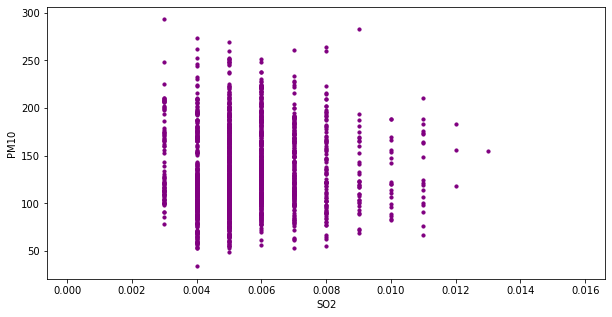

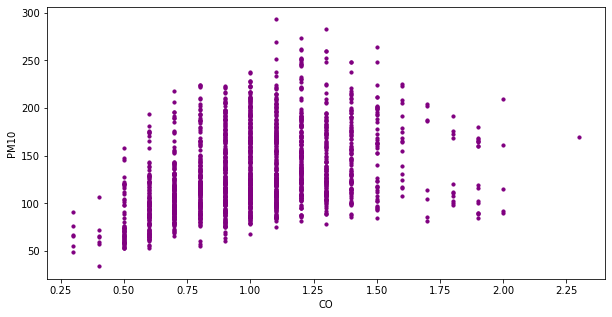

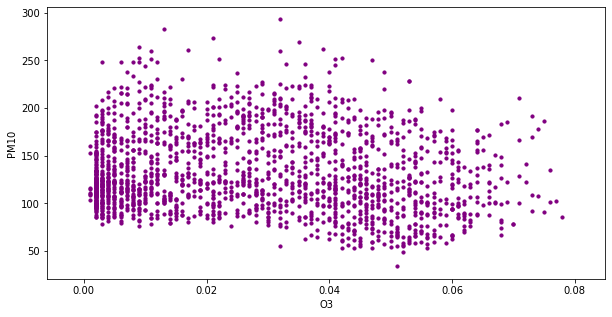

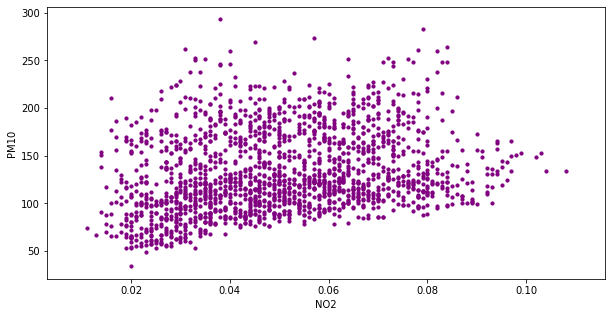

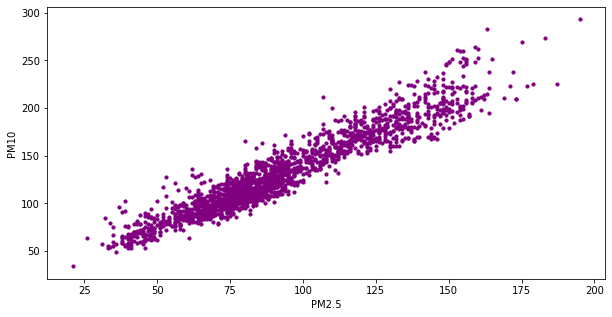

In [0]:
# 3단계 : 분석에 사용할 특성서택

# 연속적인 열 변수가 아니기 때문에 이름에 해당하는 것으로 연결해야 함
nair = air[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM2.5']]

# 종속변수는 mpg로 두고, mpg와 다른 변수(나머지 3개) 사이의 선형관계여부를 확인
# plot을 통해 관계(음인지, 양인지, 없는지)를 파악해보면 됨
nair.plot(kind='scatter', x='SO2', y='PM10', c='purple', s=10, figsize=(10,5))
nair.plot(kind='scatter', x='CO', y='PM10', c='purple', s=10, figsize=(10,5))
nair.plot(kind='scatter', x='O3', y='PM10', c='purple', s=10, figsize=(10,5))
nair.plot(kind='scatter', x='NO2', y='PM10', c='purple', s=10, figsize=(10,5))
nair.plot(kind='scatter', x='PM2.5', y='PM10', c='purple', s=10, figsize=(10,5))
plt.show()

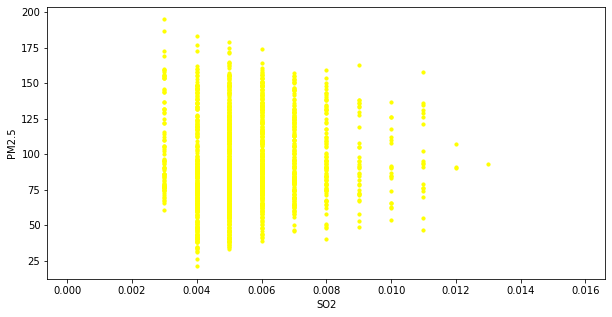

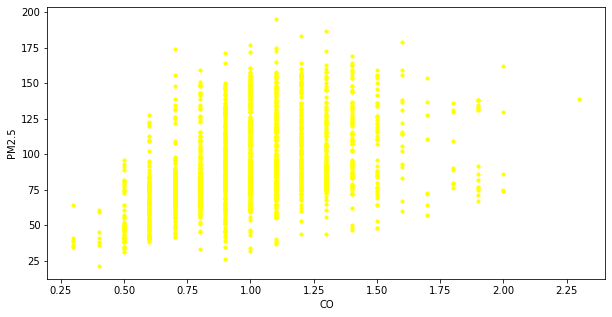

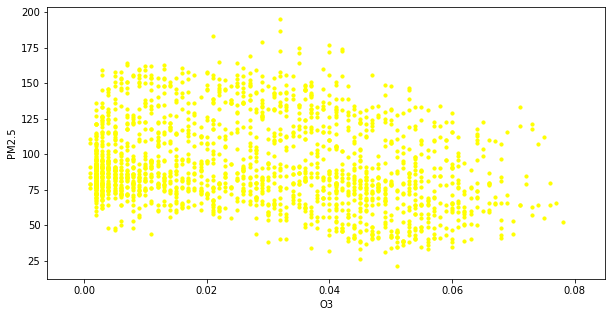

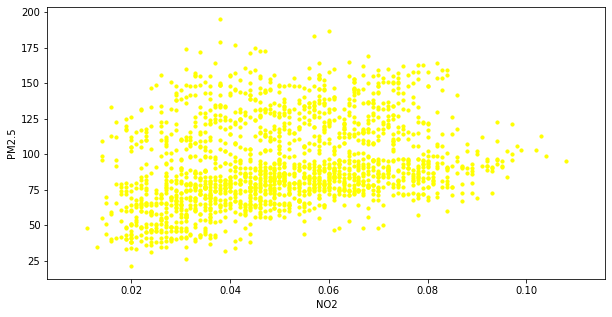

In [0]:
# 3단계 : 분석에 사용할 특성서택

# 연속적인 열 변수가 아니기 때문에 이름에 해당하는 것으로 연결해야 함
nair = air[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM2.5']]

# 종속변수는 mpg로 두고, mpg와 다른 변수(나머지 3개) 사이의 선형관계여부를 확인
# plot을 통해 관계(음인지, 양인지, 없는지)를 파악해보면 됨
nair.plot(kind='scatter', x='SO2', y='PM2.5', c='yellow', s=10, figsize=(10,5))
nair.plot(kind='scatter', x='CO', y='PM2.5', c='yellow', s=10, figsize=(10,5))
nair.plot(kind='scatter', x='O3', y='PM2.5', c='yellow', s=10, figsize=(10,5))
nair.plot(kind='scatter', x='NO2', y='PM2.5', c='yellow', s=10, figsize=(10,5))
plt.show()

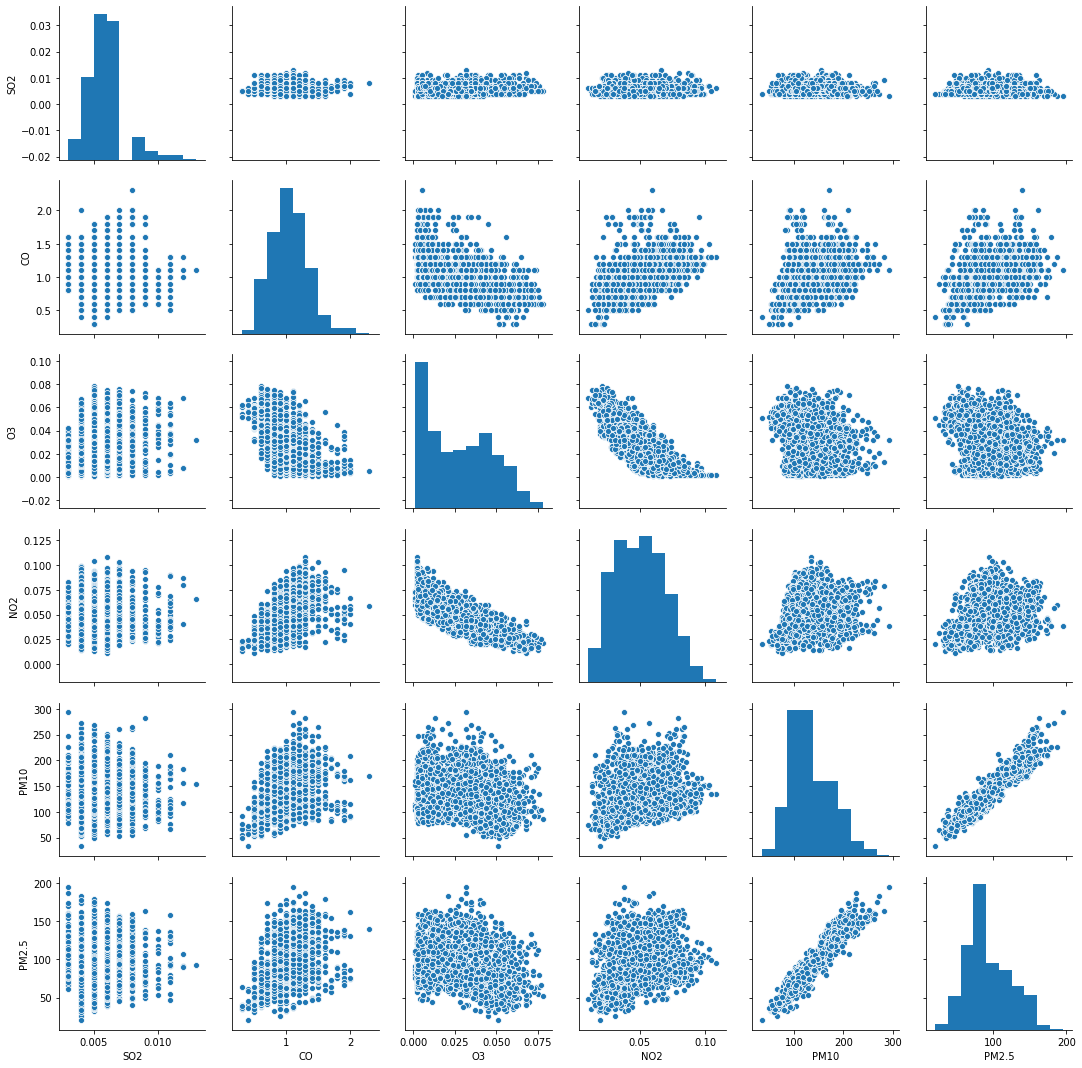

In [0]:
sns.pairplot(nair)
plt.show()
plt.close()

In [0]:
'''

각 변수들에서는 선형 관계를 찾아볼 수 없다
하지만 딥러닝 기법에서는 굳이 '선형관계'가 필요 없다(은영님말씀)

'''